## KERAS TUTORIAL 1

Let's start by importing numpy and setting a seed for the computer's pseudorandom number generator. This allows us to reproduce the results from our script:

In [128]:
import numpy as np
np.random.seed(123)
from keras import backend as K
K.set_image_dim_ordering('th')

Next, we'll import the Sequential model type from Keras. This is simply a linear stack of neural network layers, and it's perfect for the type of feed-forward CNN we're building in this tutorial.

In [129]:
from keras.models import Sequential

Next, let's import the "core" layers from Keras. These are the layers that are used in almost any neural network:

In [130]:
from keras.layers import Dense, Dropout, Activation, Flatten

Then, we'll import the CNN layers from Keras. These are the convolutional layers that will help us efficiently train on image data:

In [131]:
from keras.layers import Convolution2D, MaxPooling2D, Conv2D

Finally, we'll import some utilities. This will help us transform our data later:

In [132]:
from keras.utils import np_utils

## Load image data from MNIST.

In [133]:
from keras.datasets import  mnist

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [134]:
print(X_train.shape)

(60000, 28, 28)


Great, so it appears that we have 60,000 samples in our training set, and the images are 28 pixels x 28 pixels each. We can confirm this by plotting the first sample in matplotlib:

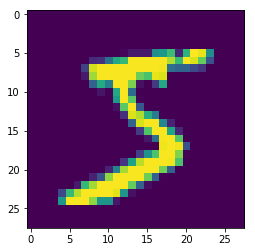

In [135]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In general, when working with computer vision, it's helpful to visually plot the data before doing any algorithm work. It's a quick sanity check that can prevent easily avoidable mistakes (such as misinterpreting the data dimensions).

## Preprocess input data for Keras.

When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. For example, a full-color image with all 3 RGB channels will have a depth of 3.

Our MNIST images only have a depth of 1, but we must explicitly declare that.

In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).

In [136]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [137]:
print(X_train.shape)

(60000, 1, 28, 28)


The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [138]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Now, our input data are ready for model training.

## Preprocess class labels for Keras.

Next, let's take a look at the shape of our class label data:

In [139]:
print(y_train.shape)

(60000,)


Hmm... that may be problematic. We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array. Let's take a look at the labels for the first 10 training samples:

In [140]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


And there's the problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values.

We can fix this easily:

In [141]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [142]:
print(Y_train.shape)

(60000, 10)


## Define model architecture.

Let's start by declaring a sequential model format:

In [143]:
model = Sequential()

Next, we declare the input layer:

In [144]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))


The input shape parameter should be the shape of 1 sample. In this case, it's the same (1, 28, 28) that corresponds to  the (depth, width, height) of each digit image.

But what do the first 3 parameters represent? They correspond to the number of convolution filters to use, the number of rows in each convolution kernel, and the number of columns in each convolution kernel, respectively.

*Note: The step size is (1,1) by default, and it can be tuned using the 'subsample' parameter.

We can confirm this by printing the shape of the current model output:

In [145]:
print(model.output_shape)

(None, 32, 26, 26)


Next, we can simply add more layers to our model like we're building legos:

In [146]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Again, we won't go into the theory too much, but it's important to highlight the Dropout layer we just added. This is a method for regularizing our model in order to prevent overfitting. You can read more about it here.

MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

So far, for model parameters, we've added two Convolution layers. To complete our model architecture, let's add a fully connected layer and then the output layer:

In [147]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

Here's how the entire model architecture looks together:

## Compile model.

Now we're in the home stretch! The hard part is already over.

We just need to compile the model and we'll be ready to train it. When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.).

In [148]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Keras has a variety of loss functions and out-of-the-box optimizers to choose from.

##  Fit model on training data.

In [149]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.5/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 373s 6ms/step - loss: 0.1523 - acc: 0.9536
Epoch 2/10
60000/60000 [==============================] - 397s 7ms/step - loss: 0.0589 - acc: 0.9818
Epoch 3/10
60000/60000 [==============================] - 386s 6ms/step - loss: 0.0439 - acc: 0.9862
Epoch 4/10
60000/60000 [==============================] - 389s 6ms/step - loss: 0.0327 - acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 391s 7ms/step - loss: 0.0269 - acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 400s 7ms/step - loss: 0.0240 - acc: 0.9920
Epoch 7/10
60000/60000 [==============================] - 396s 7ms/step - loss: 0.0213 - acc: 0.9934
Epoch 8/10
60000/60000 [==============================] - 386s 6ms/step - loss: 0.0172 - acc: 0.9942
Epoch 9/10
60000/60000 [==============================] - 389s 6ms/step - loss: 0.0168 - acc: 0.9945
Epoch 10/10
60000/60000 [==============================] - 389s 6ms/step - loss: 0.0151 - a

## Evaluate model on test data.

In [152]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.027853528876048767, 0.9922]

In [156]:
model.predict(X_test)

array([[1.3359961e-14, 5.2568254e-14, 2.1201823e-13, ..., 1.0000000e+00,
        5.5095233e-15, 4.8556971e-11],
       [1.0549340e-15, 3.9817982e-10, 1.0000000e+00, ..., 4.2971112e-15,
        3.7460326e-16, 1.8021838e-18],
       [3.2968129e-12, 9.9999964e-01, 2.4852671e-09, ..., 1.6312762e-07,
        1.3047371e-09, 6.1115677e-09],
       ...,
       [1.6758565e-20, 1.3680541e-14, 4.5219333e-19, ..., 9.1516968e-12,
        1.1416063e-12, 1.9717214e-12],
       [1.3611970e-12, 2.7219743e-16, 8.9855648e-19, ..., 8.7455135e-15,
        6.6312154e-08, 1.4512110e-11],
       [1.8599795e-11, 6.8806875e-15, 2.3540527e-11, ..., 1.0759027e-19,
        6.0329730e-10, 1.5257845e-14]], dtype=float32)